# Map analysis

Analyse the maps of the different malls.

## Load dependencies

In [54]:
import pandas as pd
import numpy as np
import copy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

from IPython.display import Image

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from msci.utils import utils
from msci.analysis.networks import *

In [21]:
from msci.modelling.abm.environment import Environment
from msci.modelling.abm.shopper import Shopper
from msci.modelling.abm.shop import Shop
from msci.modelling.abm.animation import ShoppersAnimation
from msci.modelling.abm.simulation import simulate
from msci.modelling.abm.utils import find_store_id

In [6]:
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

## Import data

In [ ]:
mauritius_signal_df = utils.import_signals('Mall of Mauritius', version=3)

In [ ]:
mauritius_signal_df.head(5)

### Mall of Mauritius

This is the largest of the three mall. It contains around 150 shops and recieves almost 700,000 people each month.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

img = mpimg.imread("../../images/mall_of_mauritius_map.png")
axes.imshow(img[::-1], origin='lower', extent=[-77,470,-18,255], alpha=1)

axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)')
axes.legend(loc='upper center', markerscale=10., ncol=15, bbox_to_anchor=(0.5, -0.1));

## Simulation Setup

In [81]:
main_environment = Environment(area=[
    ['-' for _ in range(400)] for _ in range(250)
])

main_shops = [
    Shop(name='notshop', corners=[(30,25), (30,0), (315, 0), (315, 30)]),
    
    Shop(name='shop0', corners=[(50,25), (30,25), (30,70), (50, 70)]),
    Shop(name='shop1', corners=[(50,70), (30,70), (30,110), (60, 110)]),
    Shop(name='shop2', corners=[(80,85), (60,85), (60,110), (110, 110)]),
    Shop(name='shop3', corners=[(110,110), (85,110), (85,120), (130, 120)]),
    Shop(name='shop4', corners=[(130, 120), (95, 120), (95, 145), (155, 145)]),
    Shop(name='shop5', corners=[(145, 145), (130, 145), (130, 180), (200, 180), (200, 145)]),
    Shop(name='shop6', corners=[(200, 145), (200, 190), (285, 190), (285, 145), (215, 145), (215, 130)]),
    Shop(name='shop7', corners=[(215, 130), (215, 145), (250, 145), (250, 105)]),
    Shop(name='shop8', corners=[(250, 105), (250, 130), (270, 130), (270, 85)]),
    Shop(name='shop9', corners=[(270, 85), (270, 110), (360, 110), (360, 30), (305, 30)]),
    
    Shop(name='B202', corners=[(70,55), (85,55), (85,50), (70, 50)]),
    Shop(name='B201', corners=[(70,50), (85,50), (85,45), (70, 45)]),
    Shop(name='B200', corners=[(70,45), (85,45), (85,40), (70, 40)]),
    Shop(name='B196', corners=[(70,40), (85,40), (85,35), (70, 35)]),
    Shop(name='B199', corners=[(70,35), (85,35), (85,30), (70, 30)]),
    Shop(name='B198', corners=[(70,30), (85,30), (85,25)]),
    Shop(name='B225', corners=[(85,25), (85,45), (95,45), (95, 25)]),
    Shop(name='B223', corners=[(95,25), (95,45), (115,45), (115, 25)]),
    Shop(name='B222', corners=[(115,25), (115,45), (130,45), (130, 25)]),
    Shop(name='B203', corners=[(85,55), (85,45), (110,45), (110, 55)]),
    Shop(name='B209', corners=[(110,55), (110,45), (130,45), (130, 55)]),
    Shop(name='B221', corners=[(130, 25), (130,40), (145,40), (145, 25)]),
    Shop(name='B219', corners=[(145, 25), (145,40), (165,40), (165, 25)]),
    Shop(name='B211', corners=[(130, 55), (130,40), (135,40), (135, 55)]),
    Shop(name='B212', corners=[(135, 55), (135,40), (140,40), (140, 55)]),
    Shop(name='B213', corners=[(140, 55), (140,40), (145,40), (145, 55)]),
    Shop(name='B217', corners=[(145, 55), (145,40), (165,40), (165, 55)]),
    
    Shop(name='shop15', corners=[(85, 65), (110,65), (110,100)]),
    Shop(name='shop16', corners=[(110,95), (135,95), (135, 110)]),
    Shop(name='shop17', corners=[(135,110), (135,85), (155, 85)]),
    Shop(name='shop18', corners=[(155,85), (110,85), (110, 65)]),
    
    Shop(name='shop19', corners=[(205,85), (215,85), (215, 70)]),
    Shop(name='shop20', corners=[(190,85), (215,85), (215, 115)]),
    Shop(name='shop21', corners=[(215,115), (215,85), (260, 85)]),
    Shop(name='shop22', corners=[(260, 85), (215, 85), (215, 70)]),

    Shop(name='B229', corners=[(185, 35), (220, 35), (220, 50), (185, 50)]),
    Shop(name='B231', corners=[(185, 50), (195, 50), (195, 55)]),
    Shop(name='B215', corners=[(195, 55), (195, 50), (200, 50), (200, 55)]),
    Shop(name='B233', corners=[(200, 55), (200, 50), (205, 50), (205, 55)]),
    Shop(name='B235', corners=[(205, 55), (205, 50), (210, 50), (210, 55)]),
    Shop(name='B237', corners=[(210, 55), (210, 50), (220, 50), (220, 55)]),
    Shop(name='B227', corners=[(185, 35), (220, 35), (220, 15)]),
    Shop(name='B245', corners=[(220, 55), (220, 25), (235, 25), (235, 55)]),
    Shop(name='B247', corners=[(235, 55), (235, 15), (255, 15), (255, 55)]),
    Shop(name='shop27', corners=[(255, 55), (255, 30), (270, 30), (270, 55)]),
    Shop(name='shop28', corners=[(255, 15), (255, 30), (275, 30), (275, 20)]),
    
]

for shop in tqdm(main_shops):
    shop.add_walls(main_environment)

HBox(children=(IntProgress(value=0, max=47), HTML(value='')))

## Simulation

In [106]:
environment = copy.deepcopy(main_environment)
shops = copy.deepcopy(main_shops)

In [107]:
shoppers_history, signal_history = simulate(max_iterations=1000, max_shoppers=500, environment=environment)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

In [84]:
%%capture
img = mpimg.imread("../../images/mall_of_mauritius_map.png")
anim = ShoppersAnimation(shoppers_history, environment, interval=100, image=img)

In [85]:
HTML(anim.run().to_html5_video())

## Add store_id

In [108]:
sim_signal_df = pd.DataFrame(signal_history, columns=['mac_address', 'date_time', 'x', 'y'])
sim_signal_df['xy'] = list(zip(sim_signal_df.x.values, sim_signal_df.y))

In [109]:
sim_signal_df['store_id'] = find_store_id(sim_signal_df, shops)

## Network

In [110]:
from msci.analysis.networks import *
from msci.utils.plot import create_count_of_shoppers_gif, create_count_of_shoppers_image

In [111]:
adjacency_matrix, count_of_shoppers, store_ids_indices, frame_times = \
    create_adjacency_matrices(sim_signal_df, sliding_interval=10, window_size=30)

HBox(children=(IntProgress(value=0, max=96), HTML(value='')))

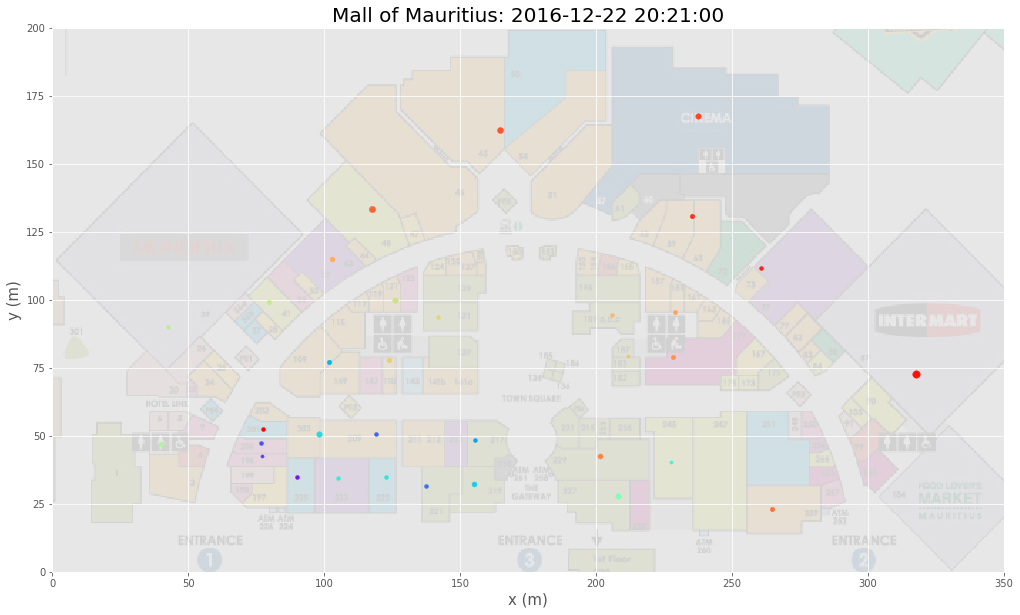

In [112]:
create_count_of_shoppers_image(count_of_shoppers, frame_times, count_index=80)

In [ ]:
%%capture
create_count_of_shoppers_gif(count_of_shoppers, frame_times, gif_filename='sim_count_of_shoppers')

## In-degree

In [113]:
total_shopper_count = calculate_total_count_of_shoppers(sim_signal_df)

In [114]:
total_shopper_count_df = pd.DataFrame.from_dict(total_shopper_count, orient='index')

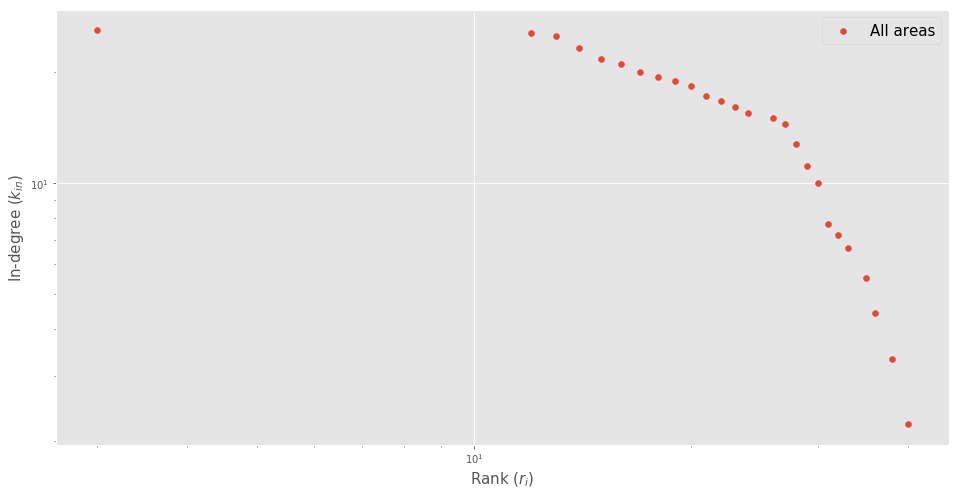

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

degrees, rank = calculate_in_degree_rank(total_shopper_count_df)
plt.scatter(degrees, rank, label='All areas')

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Rank ($r_{i}$)', fontsize=15)
ax.set_ylabel('In-degree ($k_{in}$)', fontsize=15);
ax.legend(loc='best', fontsize=15);

In [131]:
total_shopper_count_df.sort_values('frequency')

,index,x,y,frequency
more than 1 shop,26,140.000000,45.000000,3
B233,21,207.333333,53.066667,12
B201,4,77.153846,42.461538,13
B231,20,197.736842,53.368421,13
B219,13,132.355556,48.200000,13
B199,2,80.944444,27.888889,14
B200,3,78.277778,37.666667,14
B215,11,202.578947,53.000000,14
B229,19,191.818182,52.000000,15
B196,0,77.180000,32.400000,16
